# Linear Regression (Python Implementation)

- https://www.geeksforgeeks.org/linear-regression-python-implementation/
- https://towardsdatascience.com/linear-regression-part-1-types-examples-gradient-descent-example-2e8c22b05f61
- https://towardsdatascience.com/linear-regression-python-implementation-ae0d95348ac4

$$h(x_{i})=\beta_{0}+\beta_{1}x_{i}$$

Here,

- $h(x_{i})$ represents the predicted response value for ith observation.
- $\beta_{0}$ and $\beta_{1}$ are regression coefficients and represent y-intercept and slope of regression line respectively.


## Least Squares technique

In [3]:
%matplotlib inline

Estimated coefficients:
b_0 = 1.23636363636
b_1 = 1.1696969697


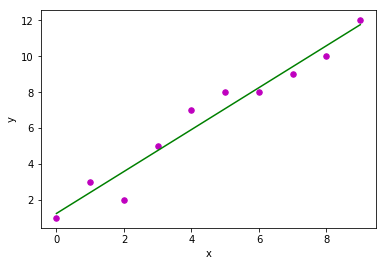

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 

    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 

    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 

    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 

    return(b_0, b_1) 

def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    # predicted response vector 
    y_pred = b[0] + b[1]*x 

    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 

    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

    # function to show plot 
    plt.show() 

def main(): 
    # observations 
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 

    # plotting regression line 
    plot_regression_line(x, y, b) 

if __name__ == "__main__": 
    main() 


## Multiple linear regression

X (**feature matrix**) = a matrix of size $n x p$ where $x_{ij}$ denotes the values of jth feature for ith observation.

So,

$$\begin{pmatrix}
 x_{11} & \cdots & x_{1p}\\ 
 x_{21} & \cdots & x_{2p}\\ 
 \vdots & \ddots & \vdots\\ 
 x_{n1} & \cdots & x_{np}
 \end{pmatrix}$$

and

y (**response vector**) = a vector of size $n$ where $y_{i}$ denotes the value of response for ith observation.

$$y = \begin{bmatrix}
 y_1 \\
 y_2 \\
 \vdots \\
 y_n
\end{bmatrix}$$

The regression line for p features is represented as:
$$h(x_i)=\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_px_{ip}$$

Also, we can write:
$$y_i=\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_px_{ip}+\varepsilon_i$$
or
$$y_i = h(x_i) + \varepsilon_i \Rightarrow \varepsilon_i = y_i - h(x_i)$$
where $\varepsilon_i$ represents residual error in ith observation.

We can generalize our linear model a little bit more by representing feature matrix **X** as:
$$X = \begin{pmatrix}
 1 & x_{11} & \cdots & x_{1p}\\ 
 1 & x_{21} & \cdots & x_{2p}\\ 
 \vdots & \vdots & \ddots & \vdots\\ 
 1 & x_{n1} & \cdots & x_{np}
\end{pmatrix}$$
So now, the linear model can be expressed in terms of matrices as:
$$y = X \beta + \varepsilon$$
where,
$$\beta = \begin{bmatrix}
\beta_0\\ 
\beta_1\\ 
.\\ 
.\\ 
\beta_p
\end{bmatrix}$$
and.
$$\varepsilon = \begin{bmatrix}
\varepsilon_0\\ 
\varepsilon_1\\ 
.\\ 
.\\ 
\varepsilon_p
\end{bmatrix}$$
Now, we determine estimate of $\beta$, i.e. $\beta’$ using Least Squares method.

We present the result directly here:
$$\widehat{\beta}=(X'X)^{-1}X'y$$
where ‘ represents the transpose of the matrix while -1 represents the matrix inverse.
Knowing the least square estimates, b’, the multiple linear regression model can now be estimated as:
$$\widehat{y}=X\widehat{\beta}$$

('Coefficients: \n', array([-8.95714048e-02,  6.73132853e-02,  5.04649248e-02,  2.18579583e+00,
       -1.72053975e+01,  3.63606995e+00,  2.05579939e-03, -1.36602886e+00,
        2.89576718e-01, -1.22700072e-02, -8.34881849e-01,  9.40360790e-03,
       -5.04008320e-01]))
Variance score: 0.720905667266


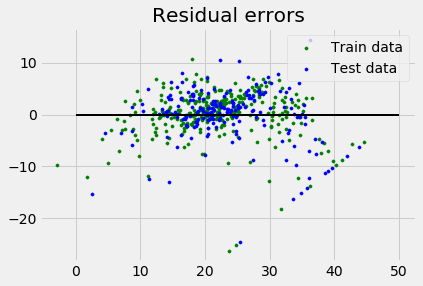

In [10]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 

# load the boston dataset 
boston = datasets.load_boston(return_X_y=False) 

# defining feature matrix(X) and response vector(y) 
X = boston.data 
y = boston.target 

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

# create linear regression object 
reg = linear_model.LinearRegression() 

# train the model using the training sets 
reg.fit(X_train, y_train) 

# regression coefficients 
print('Coefficients: \n', reg.coef_) 

# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

# plot for residual error 

## setting plot style 
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show() 
